In [1]:
library(ggplot2)

# Simple Linear Regression

In [2]:
# Loading dataset
sales_rainfall <- read.csv(file = "../../datasets/sales_vs_rainfall.csv") 

# Top dataset values
head(sales_rainfall)

rainfall_in_mm,sales_in_inr
2,100000
5,95000
8,80000
9,320000
12,50000
12,52000


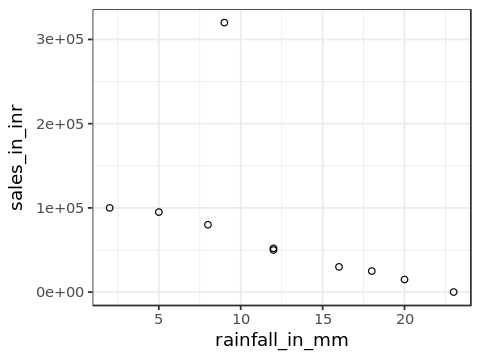

In [3]:
# The original values shows a 
# 1. linear relationship between the two
# 2. Different scales
options(repr.plot.width=4, repr.plot.height=3)
ggplot(sales_rainfall) +
  geom_point(aes(rainfall_in_mm, sales_in_inr), pch = 1) +
  theme_bw()


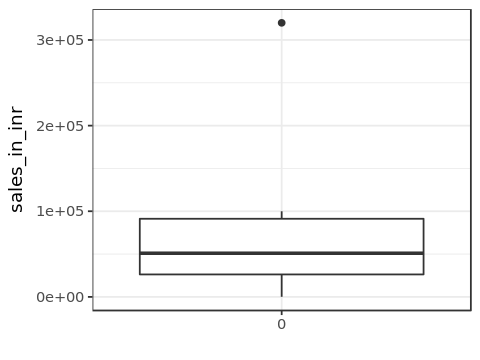

In [4]:
# Data with an outlier
options(repr.plot.width=4, repr.plot.height=3)
ggplot(sales_rainfall) +
  geom_boxplot(aes(factor(0), sales_in_inr)) +
  theme_bw() + 
  xlab("")

In [5]:
# Checking relationship using covariance matrix
cov(sales_rainfall) # A negative relationship with value (-326383.3)

,rainfall_in_mm,sales_in_inr
rainfall_in_mm,45.38889,-326383.3
sales_in_inr,-326383.33333,8437196555.6


In [6]:
# Scaling the dataset to bring both response variable in same scale
sales_rainfall <- as.data.frame(scale(sales_rainfall))
cov(sales_rainfall) # Still negative relationship holds but this time value ranges between [-1,1] i.e. (-0.53)

,rainfall_in_mm,sales_in_inr
rainfall_in_mm,1.000000,-0.527417
sales_in_inr,-0.527417,1.000000


In [7]:
# Fitting the simple linear regression model
simple_reg <- lm(formula = sales_in_inr~rainfall_in_mm, 
                 data = sales_rainfall)
simple_reg


Call:
lm(formula = sales_in_inr ~ rainfall_in_mm, data = sales_rainfall)

Coefficients:
   (Intercept)  rainfall_in_mm  
     7.599e-17      -5.274e-01  


In [8]:
# RSS
mean((sales_rainfall$sales_in_inr - simple_reg$fitted.values)^2)

[1] 0.6496482

In [9]:
# Trobleshooting with outlier - replacing it with average of its surrounding observations
ind <- which.max(sales_rainfall$sales_in_inr) # Detecting outlier's index
sales_rainfall$sales_in_inr[ind] <- mean(sales_rainfall$sales_in_inr[ind - 1] + 
                                           sales_rainfall$sales_in_inr[ind + 1])

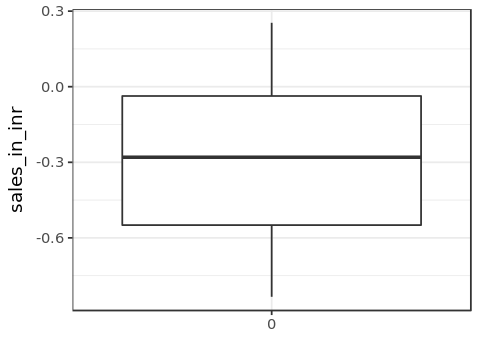

In [10]:
# Data with no outlier
options(repr.plot.width=4, repr.plot.height=3)
ggplot(sales_rainfall) +
  geom_boxplot(aes(factor(0), sales_in_inr)) +
  theme_bw() + 
  xlab("")

In [11]:
# Without outlier: Fitting the simple linear regression model
simple_reg <- lm(formula = sales_in_inr~rainfall_in_mm, 
                 data = sales_rainfall)
simple_reg


Call:
lm(formula = sales_in_inr ~ rainfall_in_mm, data = sales_rainfall)

Coefficients:
   (Intercept)  rainfall_in_mm  
       -0.2904         -0.3598  


In [12]:
# Without outlier: RSS
mean((sales_rainfall$sales_in_inr - simple_reg$fitted.values)^2)

[1] 0.004136845

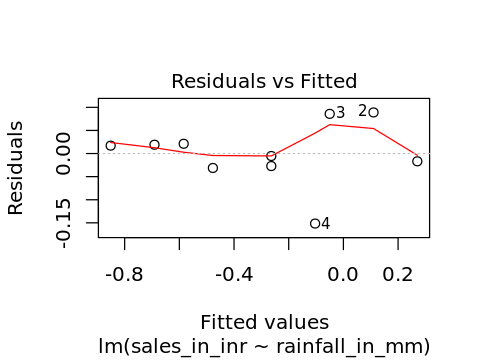

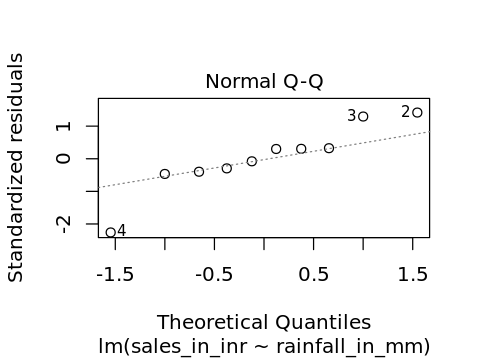

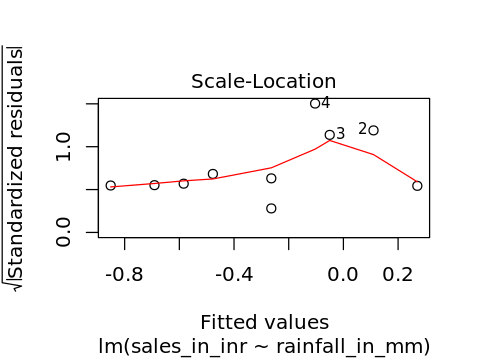

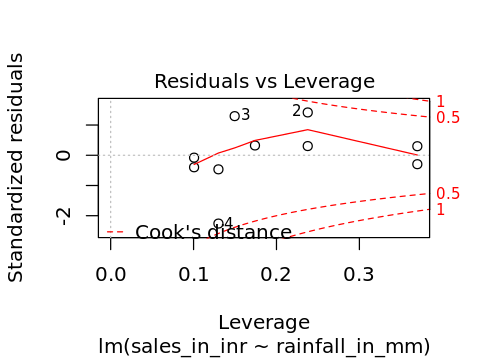

In [13]:
# Residual plot - random points spreaded across zero lines depicts that model is suitable for data.
#                 if there is any pattern in residual plot then model is not suitable for data.
plot(simple_reg)  # no pattern 

# Multiple Linear Regression

In [14]:
# Reading dataset
mult_data <- read.csv("../../datasets/mult_reg.csv")
head(mult_data)

y,X1,X2,X3,X4
2,5,150,40,68
8,12,120,40,60
9,8,100,40,98
15,20,85,40,43
26,30,60,40,89
34,45,44,40,81


In [15]:
# Finding Correlation among the variables 
cov(mult_data)

,y,X1,X2,X3,X4
y,1717.1556,1442.4444,-1813.4444,0,-843.5778
X1,1442.4444,1244.2222,-1598.8889,0,-630.3333
X2,-1813.4444,-1598.8889,2413.5556,0,667.2222
X3,0.0000,0.0000,0.0000,0,0.0000
X4,-843.5778,-630.3333,667.2222,0,1207.7889


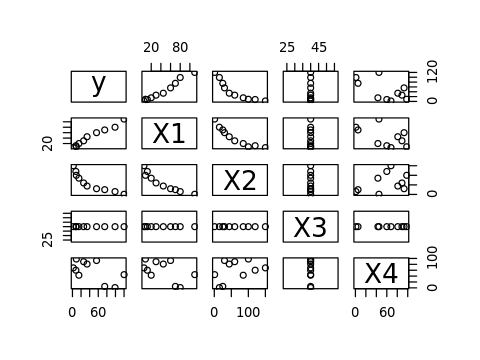

In [16]:
plot(mult_data)
# It gives the following conclusion -
# 1. Response variable X1 is directly proportional to y
# 2. Response variable X2 is indirectly proportional to y
# 3. Response variable X3 is constant overtime and doesn't correlate to y
# 4. Response variable X4 has random nature. However, it has a little indirect relationship with y

In [17]:
# Building Multiple Regression Model
mult_reg <- lm(formula = y~., 
               data = mult_data)
mult_reg


Call:
lm(formula = y ~ ., data = mult_data)

Coefficients:
(Intercept)           X1           X2           X3           X4  
    -5.0670       1.1846       0.0656           NA      -0.1164  


In [18]:
# RSS
mean((mult_data$y - mult_reg$fitted.values)^2)

[1] 26.22279

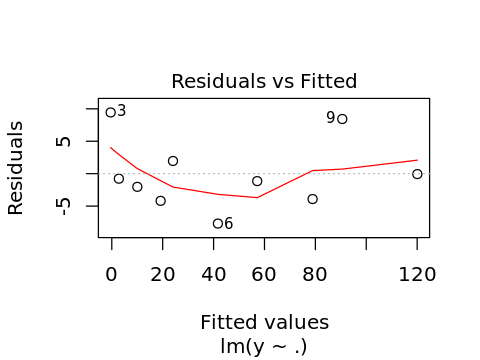

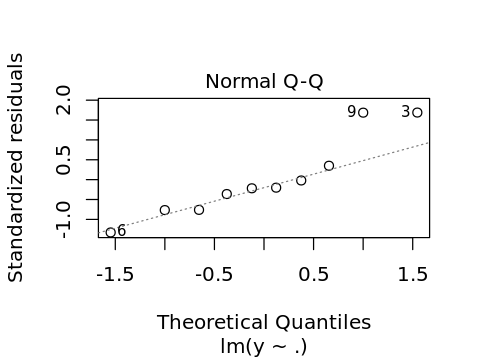

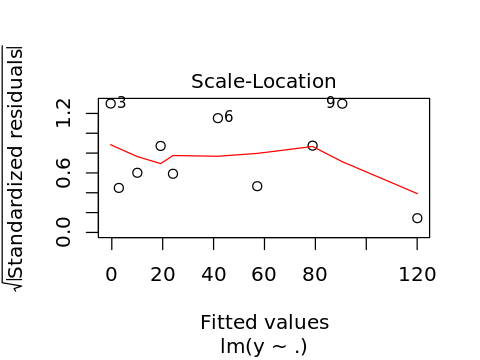

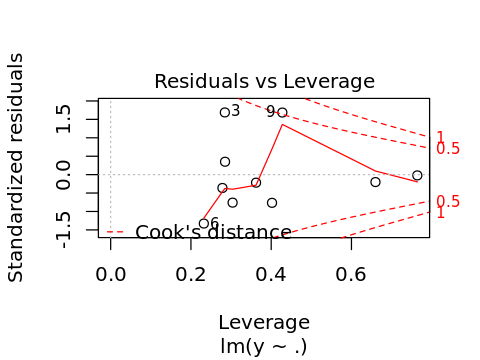

In [19]:
# Residual plot
plot(mult_reg)

In [20]:
## Variable Selection
null_model <- lm(y~1, data = mult_data)
full_model <- lm(y~., data = mult_data)
step(null_model, scope = list(lower = null_model, upper = full_model), direction = "both")

Start:  AIC=75.43
y ~ 1

       Df Sum of Sq     RSS    AIC
+ X1    1   15050.2   404.2 40.993
+ X2    1   12262.9  3191.5 61.657
+ X4    1    5302.8 10151.6 73.228
<none>              15454.4 75.431

Step:  AIC=40.99
y ~ X1

       Df Sum of Sq     RSS    AIC
+ X4    1     128.9   275.2 39.151
<none>                404.2 40.993
+ X2    1      40.5   363.7 41.938
- X1    1   15050.2 15454.4 75.431

Step:  AIC=39.15
y ~ X1 + X4

       Df Sum of Sq     RSS    AIC
<none>                275.2 39.151
+ X2    1      13.0   262.2 40.666
- X4    1     128.9   404.2 40.993
- X1    1    9876.4 10151.6 73.228



Call:
lm(formula = y ~ X1 + X4, data = mult_data)

Coefficients:
(Intercept)           X1           X4  
      3.624        1.095       -0.127  


In [21]:
# Forming model with only X1 and X4
mult_reg <- lm(formula = y~X1+X4, 
               data = mult_data)

# RSS
mean((mult_data$y - mult_reg$fitted.values)^2)

[1] 27.52385

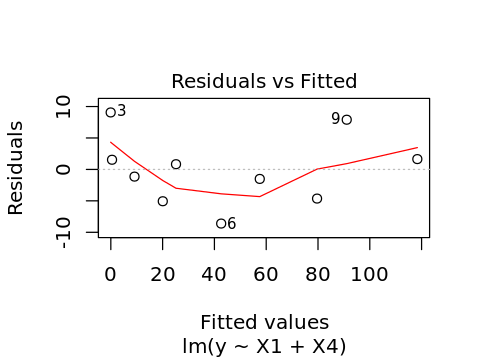

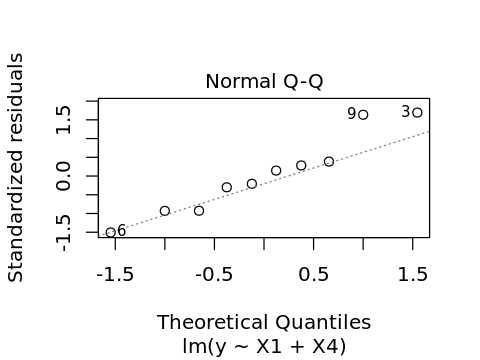

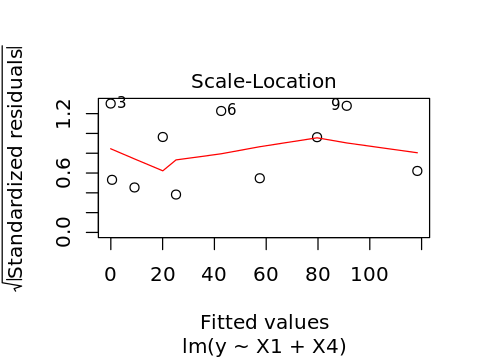

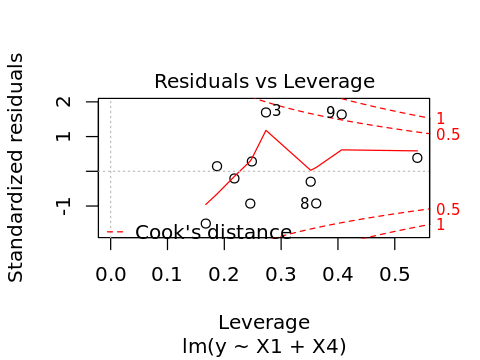

In [22]:
# Residual plot
plot(mult_reg)

# Polynomial Regression

In [23]:
poly_data <- read.csv(file = "../../datasets/poly_reg.csv") # Data Loading
head(poly_data)

rainfall_in_mm,umbrella_sales
2,5
8,15
10,35
15,24
17,18
20,40


In [24]:
# Splitting data into training and testing data
set.seed(42)
ind <- sample(x = nrow(poly_data), size = floor(0.75 * nrow(poly_data)))

poly_train <- poly_data[ind,]
poly_test <- poly_data[-ind,]

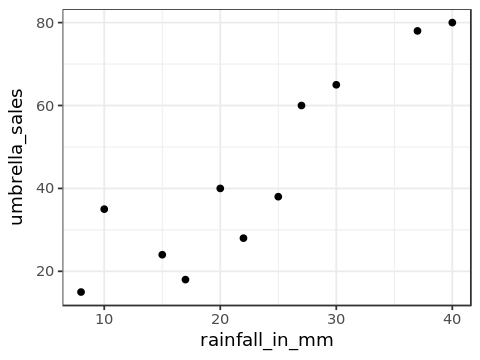

In [25]:
# Visualizing the training data
ggplot(poly_train) +
  geom_point(aes(rainfall_in_mm, umbrella_sales)) +
  theme_bw()

In [26]:
# Building polynomial regression on training data

# Order 1
poly_reg1 <- lm(formula = umbrella_sales~poly(rainfall_in_mm,1), 
                data = poly_train)
# Order 3
poly_reg3 <- lm(formula = umbrella_sales~poly(rainfall_in_mm,3), 
                data = poly_train)
# Order 5
poly_reg5 <- lm(formula = umbrella_sales~poly(rainfall_in_mm,5), 
                data = poly_train)
# Order 9
poly_reg9 <- lm(formula = umbrella_sales~poly(rainfall_in_mm,9), 
                data = poly_train)

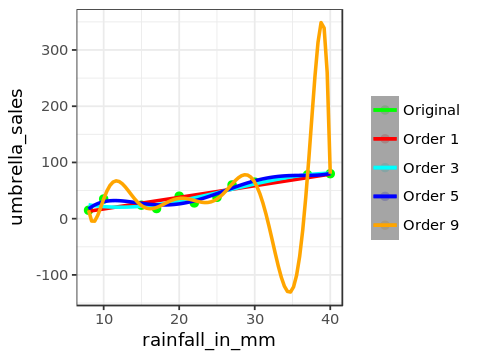

In [27]:
# Visualizing model values upon original data points
ggplot(poly_train) +
  geom_point(aes(rainfall_in_mm, umbrella_sales, col = "Original"), cex = 2) +
  stat_smooth(method = "lm", formula = y~poly(x,1), aes(rainfall_in_mm, poly_reg1$fitted.values, col = "Order 1")) +
  stat_smooth(method = "lm", formula = y~poly(x,3), aes(rainfall_in_mm, poly_reg3$fitted.values, col = "Order 3")) +
  stat_smooth(method = "lm", formula = y~poly(x,5), aes(rainfall_in_mm, poly_reg5$fitted.values, col = "Order 5")) +
  stat_smooth(method = "lm", formula = y~poly(x,9), aes(rainfall_in_mm, poly_reg9$fitted.values, col = "Order 9")) +
  scale_colour_manual("", 
                      breaks = c("Original", "Order 1", "Order 3", "Order 5", "Order 9"), 
                      values = c("red", "cyan","blue","orange","green")) +
  theme_bw()
# ggplotly(graph)

In [28]:
# RSS for training data for each model
train_rss1 <- mean((poly_train$umbrella_sales - poly_reg1$fitted.values)^2)  # Order 1
train_rss3 <- mean((poly_train$umbrella_sales - poly_reg3$fitted.values)^2)  # Order 3
train_rss5 <- mean((poly_train$umbrella_sales - poly_reg5$fitted.values)^2)  # Order 5
train_rss9 <- mean((poly_train$umbrella_sales - poly_reg9$fitted.values)^2)  # Order 9

In [29]:
# Predicting values using test data by each model
poly1_pred <- predict(object = poly_reg1, 
                      newdata =  data.frame(rainfall_in_mm = poly_test$rainfall_in_mm))
poly3_pred <- predict(object = poly_reg3, 
                      newdata =  data.frame(rainfall_in_mm = poly_test$rainfall_in_mm))
poly5_pred <- predict(object = poly_reg5, 
                      newdata =  data.frame(rainfall_in_mm = poly_test$rainfall_in_mm))
poly9_pred <- predict(object = poly_reg9, 
                      newdata =  data.frame(rainfall_in_mm = poly_test$rainfall_in_mm))

In [30]:
# RSS for testing data for each model
test_rss1 <- mean((poly_test$umbrella_sales - poly1_pred)^2)  # Order 1
test_rss3 <- mean((poly_test$umbrella_sales - poly3_pred)^2)  # Order 3
test_rss5 <- mean((poly_test$umbrella_sales - poly5_pred)^2)  # Order 5
test_rss9 <- mean((poly_test$umbrella_sales - poly9_pred)^2)  # Order 9

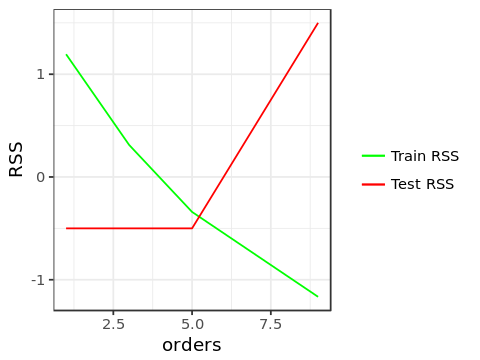

In [31]:
# Visualizing training and testing RSS for each model
train_rss <- scale(c(train_rss1, train_rss3, train_rss5, train_rss9)) # scaling 
test_rss <- scale(c(test_rss1, test_rss3, test_rss5, test_rss9))      # scaling
orders <- c(1, 3, 5, 9)

ggplot() +
  geom_line(aes(orders, train_rss, col = "Train RSS")) +
  geom_line(aes(orders, test_rss, col = "Test RSS")) +
  scale_colour_manual("", 
                      breaks = c("Train RSS", "Test RSS"), 
                      values = c("red", "green")) +
  theme_bw() + ylab("RSS")
# ggplotly(graph)